## getting_started
Introduction to using deepstack via requests and the deepstack-python package

In [1]:
from pathlib import Path
import glob
import requests
from PIL import Image

Briefly explore the test images in this repo

In [2]:
images = glob.glob('images/**/*.jpg', recursive=True)

for i, path_str in enumerate(images):
    print(i, path_str)

0 images/scenes/dog.jpg
1 images/scenes/street.jpg
2 images/scenes/farm.jpg
3 images/scenes/pool.jpg
4 images/scenes/supermarket.jpg
5 images/scenes/crossing.jpg
6 images/scenes/porsche.jpg
7 images/scenes/people_car.jpg
8 images/scenes/test-image3.jpg
9 images/faces/me.jpg
10 images/faces/idris.jpg
11 images/faces/idris_2.jpg
12 images/faces/family.jpg
13 images/faces/face.jpg
14 images/faces/couple.jpg


Select an image to work with in this tutorial

In [3]:
IMG_INDEX = 7

We can work with string paths

In [4]:
type(images[IMG_INDEX])

str

Or convert to a path, which brings the benefits of [pathlib](https://docs.python.org/3/library/pathlib.html)

In [5]:
Path(images[IMG_INDEX]).parts

('images', 'scenes', 'people_car.jpg')

pillow can open either

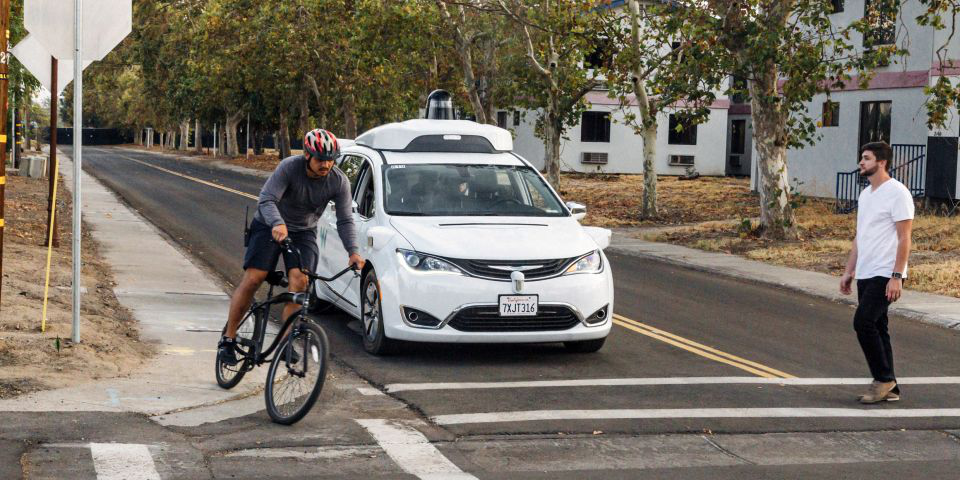

In [6]:
Image.open(images[IMG_INDEX])

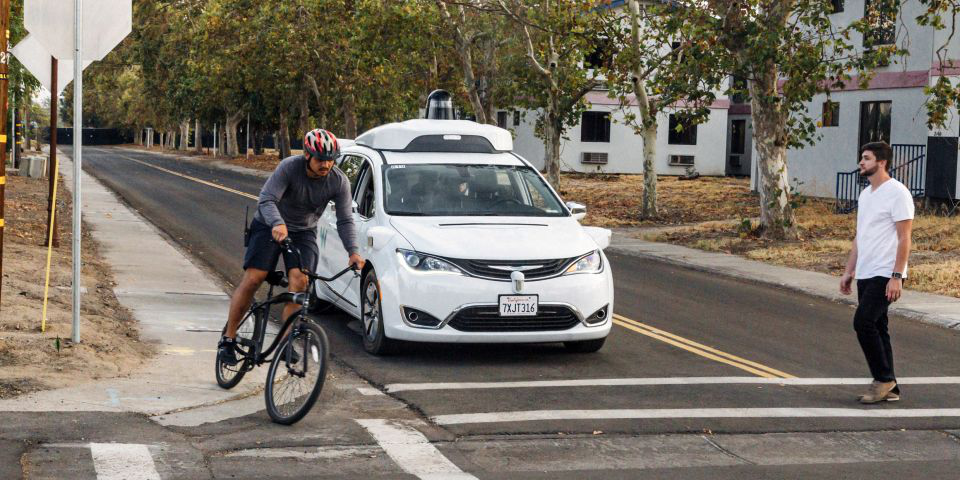

In [7]:
Image.open(Path(images[IMG_INDEX]))

## Deepstack object
You may wish to use requests, or the [deepstack-python](https://github.com/robmarkcole/deepstack-python) helper package. First using requests

In [8]:
# deepstack credentials
IP_ADDRESS = '192.168.1.84' # 'localhost' # '192.168.1.252'
PORT = 80 # 5000
API_KEY =  "" # if you have not set an api_key, just pass an empty string

In [9]:
image_data = open(images[IMG_INDEX],"rb").read()

response = requests.post(
    f"http://{IP_ADDRESS}:{PORT}/v1/vision/detection",
    files={"image":image_data}, 
    data={"api_key":API_KEY})

In [10]:
response.json()

{'success': True,
 'predictions': [{'confidence': 0.4753418,
   'label': 'stop sign',
   'y_min': 0,
   'x_min': 25,
   'y_max': 69,
   'x_max': 130},
  {'confidence': 0.6352539,
   'label': 'person',
   'y_min': 123,
   'x_min': 230,
   'y_max': 364,
   'x_max': 359},
  {'confidence': 0.70458984,
   'label': 'bicycle',
   'y_min': 241,
   'x_min': 215,
   'y_max': 426,
   'x_max': 328},
  {'confidence': 0.7919922,
   'label': 'car',
   'y_min': 121,
   'x_min': 318,
   'y_max': 354,
   'x_max': 619},
  {'confidence': 0.8520508,
   'label': 'person',
   'y_min': 144,
   'x_min': 842,
   'y_max': 403,
   'x_max': 914}]}

And using deepstack-python

In [11]:
import deepstack.core as ds

In [12]:
dsobject = ds.DeepstackObject(IP_ADDRESS, PORT, API_KEY)

In [13]:
%%time
try:
    with open(images[IMG_INDEX], 'rb') as image_bytes:
        dsobject.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 4.46 ms, sys: 2.65 ms, total: 7.11 ms
Wall time: 463 ms


In [14]:
dsobject.predictions

[{'confidence': 0.4753418,
  'label': 'stop sign',
  'y_min': 0,
  'x_min': 25,
  'y_max': 69,
  'x_max': 130},
 {'confidence': 0.6352539,
  'label': 'person',
  'y_min': 123,
  'x_min': 230,
  'y_max': 364,
  'x_max': 359},
 {'confidence': 0.70458984,
  'label': 'bicycle',
  'y_min': 241,
  'x_min': 215,
  'y_max': 426,
  'x_max': 328},
 {'confidence': 0.7919922,
  'label': 'car',
  'y_min': 121,
  'x_min': 318,
  'y_max': 354,
  'x_max': 619},
 {'confidence': 0.8520508,
  'label': 'person',
  'y_min': 144,
  'x_min': 842,
  'y_max': 403,
  'x_max': 914}]

There are some helper functions in deepstack-python, for example to get a summary of the objects

In [15]:
ds.get_objects_summary(dsobject.predictions)

{'person': 2, 'car': 1, 'bicycle': 1, 'stop sign': 1}

## Face detection

In [16]:
face_file = Path(images[13])
face_file

PosixPath('images/faces/face.jpg')

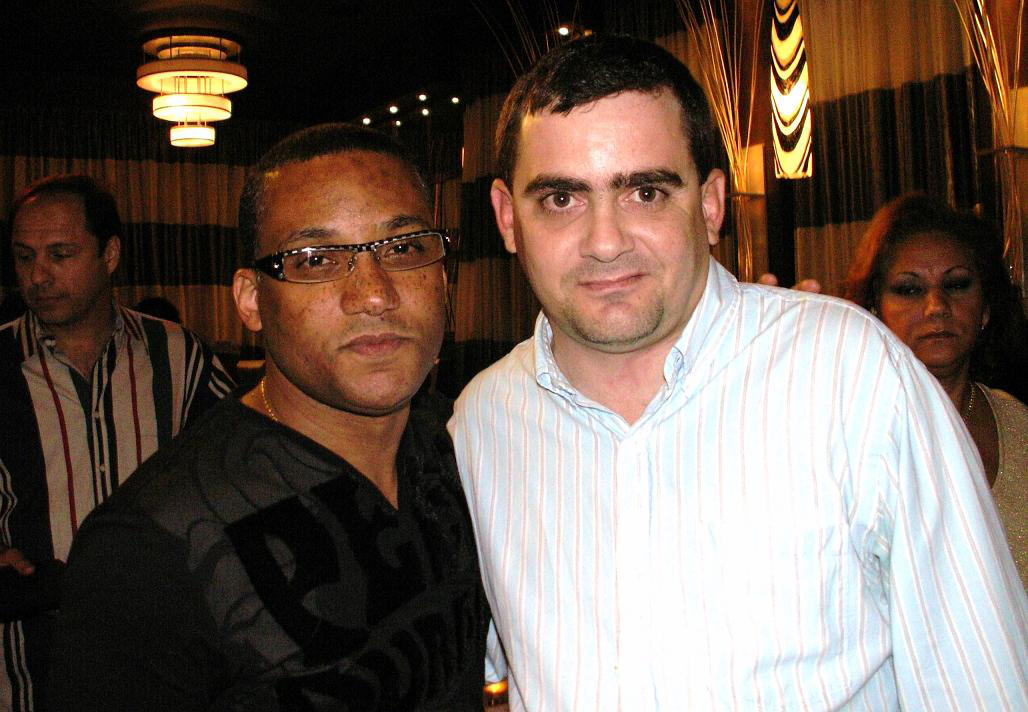

In [17]:
Image.open(face_file)

In [21]:
TIMEOUT = 20 
dsface = ds.DeepstackFace(IP_ADDRESS, PORT, API_KEY, TIMEOUT)

In [22]:
%%time
try:
    with open(face_file, "rb") as image_bytes:
        dsface.detect(image_bytes)
except ds.DeepstackException as exc:
    print(exc)

CPU times: user 7.33 ms, sys: 3.33 ms, total: 10.7 ms
Wall time: 799 ms


In [23]:
dsface.predictions

[{'confidence': 0.80908203,
  'y_min': 200,
  'x_min': 13,
  'y_max': 317,
  'x_max': 100},
 {'confidence': 0.82910156,
  'y_min': 234,
  'x_min': 870,
  'y_max': 372,
  'x_max': 986},
 {'confidence': 0.86816406,
  'y_min': 189,
  'x_min': 274,
  'y_max': 395,
  'x_max': 446},
 {'confidence': 0.8930664,
  'y_min': 99,
  'x_min': 512,
  'y_max': 339,
  'x_max': 697}]